In [1]:
from __future__ import print_function
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import ROOT
# %jsroot on
from ROOT import gROOT, gStyle, gDirectory, gPad

from array import array

import constants
import crv_event
import crv_spill
import utils
import geometry
import geometry_constants
import filepath
import portROOT2pd

gROOT.Reset()
gROOT.SetBatch(1)
gROOT.ProcessLine( "gErrorIgnoreLevel = 1001;")
gStyle.SetOptStat(111110)
gStyle.SetOptFit(0)
gStyle.SetLineScalePS(0.3)

topdir = os.path.dirname(os.path.abspath("__file__"))
analysis_dir = os.path.join(topdir,"analysis_root_files")

fileList = filepath.getfilelist(["SiDet2GainCalib"],"recoROOT",6)[0]
additional_dict = {'VoverN' :filepath.datatag["SiDet2GainCalib"]["VoverN"],
                   'gainAFE':filepath.datatag["SiDet2GainCalib"]["gainAFE"],
                   'tempN'  :filepath.datatag["SiDet2GainCalib"]["tempN"]}

nSmooth = 1 

plotdict = {'*':[["temperatureCMB[0][0]"], ["temperatureFEB[0]"],["busSiPMBias[0][0:4]"], ["busSiPMBias[0][4:8]"]]}

Welcome to JupyROOT 6.28/06


Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001755_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001756_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001757_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001758_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001759_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001760_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001761_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001762_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001763_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001764_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001765_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.001766_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000.00

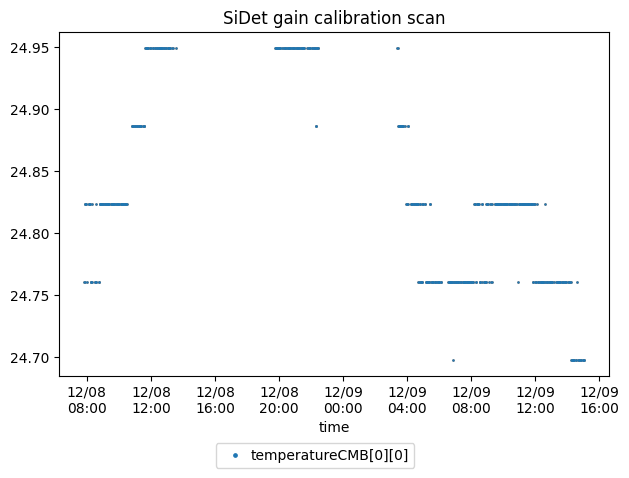

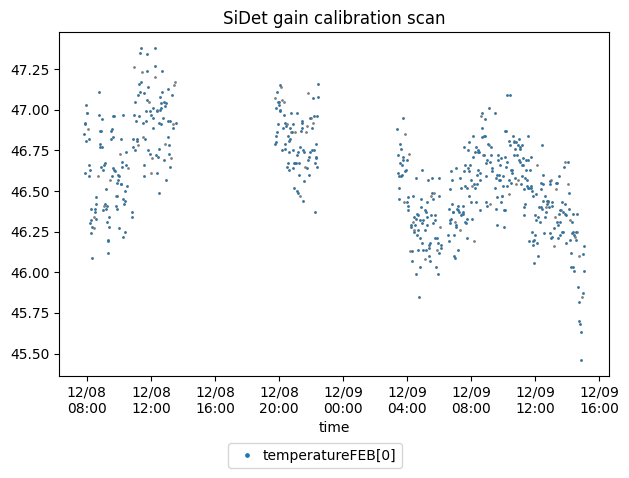

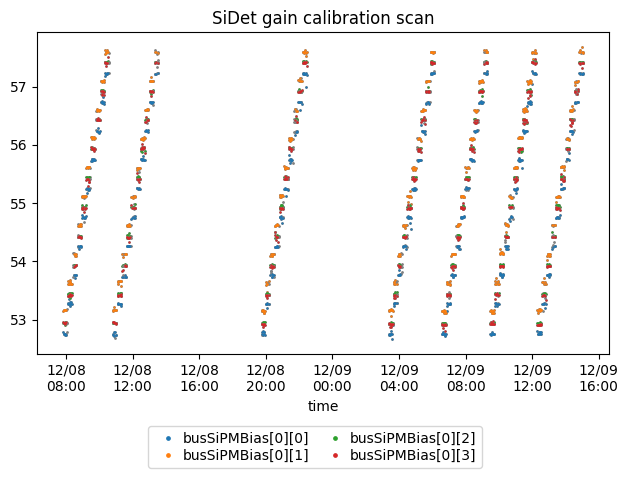

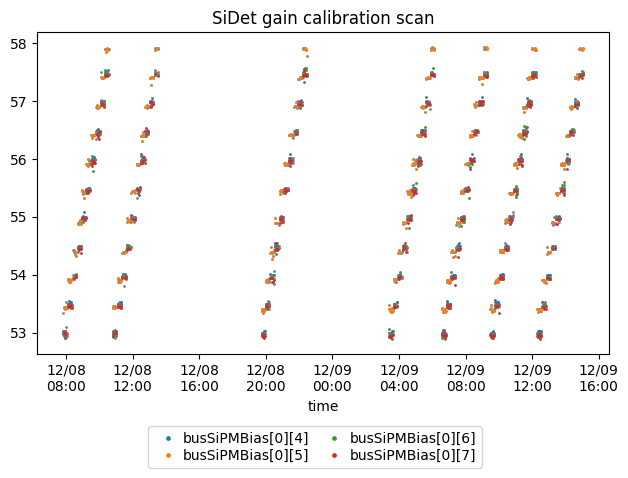

In [2]:
tfig = utils.plot_dqm(fileList, plotdict, '& 0xfffffffffffffe == 0x0', False, nSmooth, True, "SiDet gain calibration scan;time;") 

In [3]:
import pandas as pd
import pickle
from scipy import stats

df = portROOT2pd.PortToDF(fileList, additional_dict)
pklname = os.path.join(analysis_dir,"gainCalibrationSiDetRun2.pkl")

with open(pklname, 'wb') as f:
    pickle.dump(df, f)

In [1]:
from __future__ import print_function
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import pandas as pd
import pickle
from scipy.optimize import curve_fit
from scipy import stats

topdir = os.path.dirname(os.path.abspath("__file__"))
analysis_dir = os.path.join(topdir,"analysis_root_files")
pklname = os.path.join(analysis_dir,"gainCalibrationSiDetRun2.pkl")

with open(pklname, 'rb') as f:
    df = pickle.load(f)

# remove runs with Vover < 2.5V 
df = df.query("VoverN > 2.0").reset_index() 

display(df)

index   run  subrun  FEB  ch  pedestal    calibRaw    calibAdj  \
0       128  1757       0    0   0 -11.04130  315.667999  354.231995   
1       129  1757       0    0   1  17.25860  326.231995  364.552002   
2       130  1757       0    0   2   1.62558  331.212006  369.933014   
3       131  1757       0    0   3  -1.34347  324.872986  363.085999   
4       132  1757       0    0   4 -11.80810  313.194000  357.065002   
...     ...   ...     ...  ...  ..       ...         ...         ...   
3579   4475  1824       0    0  59  -7.71094  747.413025  791.812988   
3580   4476  1824       0    0  60  -8.54431  738.708008  782.390991   
3581   4477  1824       0    0  61  -4.67777  766.164978  809.888977   
3582   4478  1824       0    0  62   1.92033  747.879028  791.822998   
3583   4479  1824       0    0  63   7.94931  728.583008  772.442993   

        FEBtemp    CMBtemp   biasV        PEs  PEsCorrected  VoverN  gainAFE  \
0        46.385  24.575001  53.750  48.442276     50.987957     2.5      900   
1        46.385  24.575001  53.750  56.288933     59.298904     2.5      900   
2        46.385  24.575001  53.750  58.831814     61.911285     2.5      900   
3        46.385  24.575001  53.750  48.770992     51.417480     2.5      900   
4        46.385  25.375000  53.750  55.739235     59.366360     2.5      900   
...         ...        ...     ...        ...           ...     ...      ...   
3579  45.846252  25.633928  57.445  67.412888     72.184669     6.0      916   
3580  45.846252  25.500000  57.445  74.901482     80.015511     6.0      916   
3581  45.846252  25.500000  57.445  67.234749     71.853729     6.0      916   
3582  45.846252  25.500000  57.445  59.698959     63.795265     6.0      916   
3583  45.846252  25.500000  57.445  51.190735     54.715633     6.0      916   

      tempN  
0      25.0  
1      25.0  
2      25.0  
3      25.0  
4      25.0  
...     ...  
3579   25.0  
3580   25.0  
3581   25.0  
3582   25.0  
3583   25.0  

[3584 rows x 16 columns]

level_0  index   run  subrun  FEB  ch  pedestal  calibRaw  calibAdj  \
0         18    146  1757       0    0  18   7.20714       0.0       0.0   
1         82    210  1758       0    0  18   7.21940       0.0       0.0   
2        146    274  1759       0    0  18   7.28754       0.0       0.0   
3        210    338  1760       0    0  18   7.25359       0.0       0.0   
4        274    402  1761       0    0  18   7.11196       0.0       0.0   
..       ...    ...   ...     ...  ...  ..       ...       ...       ...   
98      3474   4370  1823       0    0  18   7.10636       0.0       0.0   
99      3475   4371  1823       0    0  19  -6.67649       0.0       0.0   
100     3527   4423  1824       0    0   7 -14.30630       0.0       0.0   
101     3538   4434  1824       0    0  18   7.11025       0.0       0.0   
102     3539   4435  1824       0    0  19  -6.56153       0.0       0.0   

       FEBtemp    CMBtemp      biasV  PEs  PEsCorrected  VoverN  gainAFE  \
0       46.385  25.500000  53.939999  0.0           0.0     2.5      900   
1      46.8275  25.508928  54.437500  0.0           0.0     3.0      900   
2    46.598892  25.500000  54.942223  0.0           0.0     3.5      900   
3     46.31222  25.500000  55.433334  0.0           0.0     4.0      900   
4        46.78  25.525000  55.930004  0.0           0.0     4.5      900   
..         ...        ...        ...  ...           ...     ...      ...   
98   46.073753  25.520834  56.920002  0.0           0.0     5.5      916   
99   46.073753  25.520834  56.920002  0.0           0.0     5.5      916   
100  45.846252  25.500000  57.230000  0.0           0.0     6.0      916   
101  45.846252  25.598215  57.415001  0.0           0.0     6.0      916   
102  45.846252  25.598215  57.415001  0.0           0.0     6.0      916   

     tempN  
0     25.0  
1     25.0  
2     25.0  
3     25.0  
4     25.0  
..     ...  
98    25.0  
99    25.0  
100   25.0  
101   25.0  
102   25.0  

[103 rows x 17 columns]

[ 7 18 19 37]


Text(0, 0.5, 'counts')

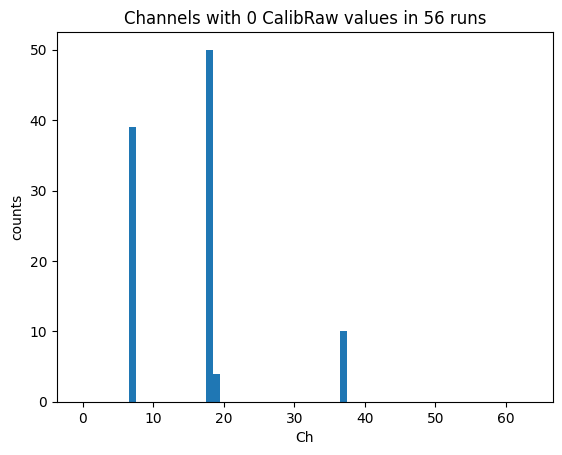

In [2]:
df1 = df.query("calibRaw == 0.0").reset_index()
display(df1)

badChannels = df1['ch'].unique()
badChannels = np.sort(badChannels)
print(badChannels)

plt.figure()
plt.hist(df1['ch'], [i-0.5 for i in range(64+1)])
plt.title("Channels with 0 CalibRaw values in 56 runs")
plt.xlabel("Ch")
plt.ylabel("counts") 

Bad channel: 7 at AFE 0x364
Bad channel: 7 at AFE 0x374
Bad channel: 7 at AFE 0x394
Bad channel: 7 at AFE 0x3A4
Too few Vbias: 7 at AFE 0x3B4
Bad channel: 18 at AFE 0x354
Bad channel: 18 at AFE 0x364
Too few Vbias: 18 at AFE 0x374
Bad channel: 18 at AFE 0x384
Bad channel: 18 at AFE 0x394
Bad channel: 18 at AFE 0x3A4
Too few Vbias: 18 at AFE 0x3B4
Too few Vbias: 19 at AFE 0x394
Too few Vbias: 37 at AFE 0x364
Too few Vbias: 37 at AFE 0x374


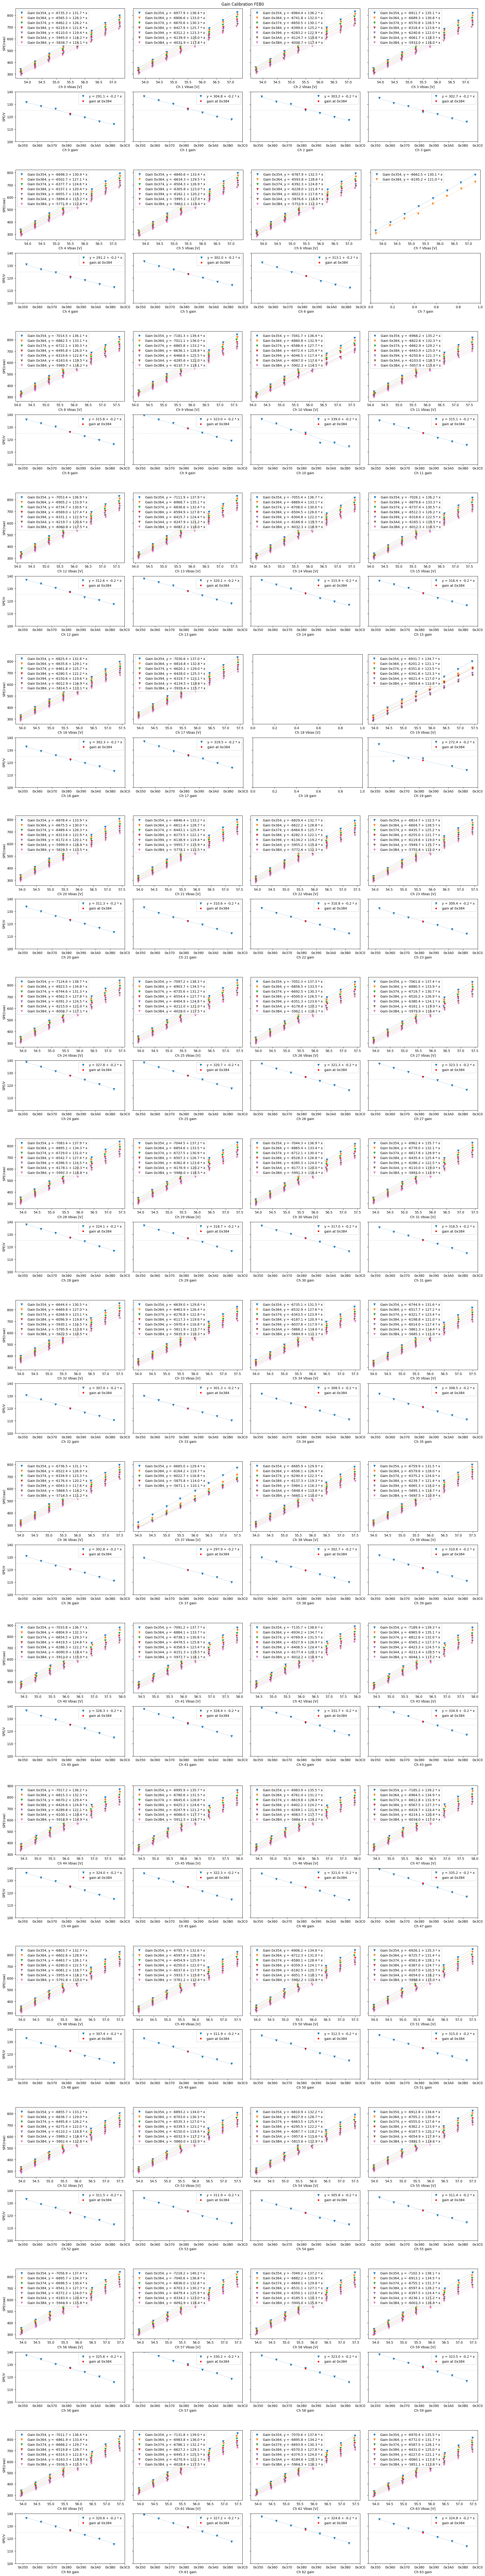

In [3]:
FEBs = df['FEB'].unique()
FEBs = np.sort(FEBs)
gainAFEs = df['gainAFE'].unique()
gainAFEs = np.sort(gainAFEs)
vAFEs = [float(val)/4096.*1.54 for val in gainAFEs]

bad_channels = [ 7, 18, 19, 37]

def to_hex(x, pos):
    return '0x%X' % int(x)

def func(x, a, b):
    return a*np.exp(b*x/4096.*1.54) # avoiding fitting overflow. convert to voltage

def plotter(FEBs, gainAFEs, title = '', nr = 16, nc = 4):
    global badChannels

    df_calib = pd.DataFrame()
    
    SPE_PER_V_AT_25C_GOAL = 125
    maintitle = title
    for FEB in FEBs:
        fig = plt.figure(layout = 'constrained', figsize = (5*nc+0.5, 6.8*nr+0.5))
        plt.suptitle(maintitle+" FEB%i"%FEB)
        subfigs = fig.subfigures(nr, 1, hspace=0.1)
        for iRow, tSubFig in enumerate(subfigs):
            axs = tSubFig.subplots(2, nc, sharey='row',
                                   gridspec_kw={'width_ratios':[5 for i in range(nc)],
                                                'height_ratios':[3.5,2.5],
                                                'wspace':0, 'hspace':0})
            
            ytitles = ['SPE(raw)', 'SPE/V']
            xtitles = ['Vbias [V]', 'gain']
            for ii in range(2):
                axs[ii, 0].set_ylabel(ytitles[ii])
            for ii in range(nc):
                for jj in range(2):
                    axs[jj, ii].set_xlabel('Ch %i'%(iRow*nc+ii)+' '+xtitles[jj])

            for inHDMI_chan in range(nc):
                chan = iRow*nc+inHDMI_chan
                gainAFEs = df['gainAFE'].unique()
                gainAFEs = np.sort(gainAFEs)
                SPEperV_list = []

                emptyFlag = True
                slopeAt0x384 = 0
                for tgainAFE in gainAFEs:
                    df_ = df.query("FEB==%i & ch==%i & gainAFE==%i"%(FEB, chan, tgainAFE)).reset_index()
                    xx = df_['biasV'].astype(float)
                    yy = df_['calibRaw'].astype(float)
                    mask = (yy>0)
                    xx=xx[mask]
                    yy=yy[mask]
                    if yy.size==0:
                        print("Bad channel: %d at AFE 0x%03X"%(chan, tgainAFE))
                        SPEperV_list.append(0)
                        continue
                    #if chan in badChannels:
                        #SPEperV_list.append(0)
                        #continue

                    if len(xx)>3 and np.max(xx)-np.min(xx)>3:
                        emptyFlag = False
                        slope, intercept, r_value, p_value, std_err = stats.linregress(xx.astype(float), yy.astype(float))
                        SPEperV_list.append(slope)
                        if tgainAFE == 0x384:
                            slopeAt0x384 = slope

                        tscatter = axs[0, inHDMI_chan].plot(xx, yy, 'v', label='Gain 0x%03X, y = %.1f + %.1f * x'%(tgainAFE, intercept, slope))
                        axs[0, inHDMI_chan].plot(xx, slope * xx + intercept, ':', color = tscatter[0].get_color(), linewidth=0.7)
                    else:
                        print("Too few Vbias: %d at AFE 0x%03X"%(chan, tgainAFE))
                        SPEperV_list.append(0)
                if not emptyFlag:
                    axs[0, inHDMI_chan].legend(fontsize=10)
                
                SPEperV_list = np.array(SPEperV_list)
                gainAFEs = np.array(gainAFEs)
                mask = (SPEperV_list>0)
                gainAFEs = gainAFEs[mask]
                SPEperV_list = SPEperV_list[mask]

                if len(gainAFEs)>2:
                    slope, intercept, r_value, p_value, std_err = stats.linregress(gainAFEs, SPEperV_list)
                    tscatter = axs[1, inHDMI_chan].plot(gainAFEs, SPEperV_list, 'v', label='y = %.1f + %.1f * x'%(intercept, slope))
                    axs[1, inHDMI_chan].plot(gainAFEs, slope * gainAFEs + intercept, ':', color = tscatter[0].get_color(), linewidth=0.7)
                    
                    lin_gain_float = (SPE_PER_V_AT_25C_GOAL - intercept)/slope
                    # lin_gain_calib = int(round(lin_gain_float))
                    # lin_SPEperV_shift = (lin_gain_calib - lin_gain_float) * slope
                    axs[1, inHDMI_chan].plot(0x384, float(slope*0x384+intercept), marker="o", ls = '', markersize=4, color='r', label = 'gain at 0x384')
                    axs[1, inHDMI_chan].axhline(y = SPE_PER_V_AT_25C_GOAL, color = '#929591', linestyle = '--', linewidth=0.3) 
                    
                    axs[1, inHDMI_chan].legend(fontsize=10)
                    axs[1, inHDMI_chan].set_xlim(840,960)
                    axs[1, inHDMI_chan].set_ylim(100,140)

                    fmt = ticker.FuncFormatter(to_hex)
                    axs[1, inHDMI_chan].get_xaxis().set_major_locator(ticker.MultipleLocator(0x10))
                    axs[1, inHDMI_chan].get_xaxis().set_major_formatter(fmt)

                    # also try exp function
                    popt, pcov = curve_fit(func, gainAFEs, SPEperV_list)
                    exp_A = popt[0]
                    exp_b = popt[1]
                    exp_gain_float = np.log(SPE_PER_V_AT_25C_GOAL/exp_A)/exp_b*4096./1.54

                else:
                    slope = 0.
                    intercept = 0.
                    lin_gain_float = 0.
                    # lin_gain_calib = 0
                    # lin_SPEperV_shift = 0.
                    exp_A = 0.
                    exp_b = 0.
                    exp_gain_float = 0.

                df_calib_ = pd.DataFrame()
                df_calib_['FEB'] = [FEB]
                df_calib_['ch'] = [chan]
                df_calib_['SPEperV_0x384'] = [slopeAt0x384]
                
                df_calib_['lin_slope'] = [slope]
                df_calib_['lin_intercept'] = [intercept]
                df_calib_['lin_gain_float'] = [lin_gain_float]
                # df_calib_['lin_gain_calib'] = [lin_gain_calib]
                # df_calib_['lin_SPEperV_shift'] = [lin_SPEperV_shift]

                df_calib_['exp_A'] = [exp_A]
                df_calib_['exp_b'] = [exp_b]
                df_calib_['exp_gain_float'] = [exp_gain_float]
                
                df_calib = pd.concat([df_calib,df_calib_], ignore_index=True)

    return df_calib 

df_calib = plotter(FEBs, gainAFEs, 'Gain Calibration')

In [4]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_calib)

    FEB  ch  SPEperV_0x384  lin_slope  lin_intercept  lin_gain_float    exp_A  \
0     0   0        121.601     -0.187        291.132         886.648  485.427   
1     0   1        125.663     -0.198        304.802         908.312  517.570   
2     0   2        125.243     -0.197        303.195         906.249  513.563   
3     0   3        123.606     -0.198        302.690         899.598  519.443   
4     0   4        120.390     -0.189        291.236         880.537  492.975   
5     0   5        123.036     -0.198        301.982         892.339  524.340   
6     0   6        121.598     -0.213        313.080         884.698  587.536   
7     0   7        120.959      0.000          0.000           0.000    0.000   
8     0   8        125.973     -0.211        315.765         905.917  564.941   
9     0   9        128.778     -0.215        323.006         919.233  578.495   
10    0  10        125.437     -0.238        338.972         898.193  700.254   
11    0  11        125.047  

In [5]:
# ch 10 not stable; ch 37 only missing 1 scan, seems fine
bad_channels = [ 7, 10, 18, 19]
df_calib_clean = df_calib[~df_calib['ch'].isin(bad_channels)]

In [6]:
# get the new setup. no large difference use linear fit results
register_list = ['46', '47', '446', '447', '846', '847', 'c46', 'c47']
gain_list = []
full_gain_list = []
for iAFE in range(8):
    ch_lo = iAFE*8-0.5
    ch_hi = iAFE*8+7.5
    df_calib_clean_ = df_calib_clean.query("ch>%f & ch<%f"%(ch_lo, ch_hi)).reset_index()
    mean_gain = int(round(np.mean(df_calib_clean_['lin_gain_float'])))
    gain_list.append(mean_gain)
    print(iAFE)
    print(list(df_calib_clean_['lin_gain_float']))
    print(mean_gain, "%03x"%mean_gain)
    full_gain_list+=([mean_gain for i in range(len(df_calib_clean_['lin_gain_float']))])
print("")
for iAFE in range(8):
    print("wr "+register_list[iAFE]+" %03x"%gain_list[iAFE])
print("")
print(full_gain_list)
full_gain_list = np.array(full_gain_list)

0
[886.6484807399331, 908.312072861581, 906.2485669297724, 899.5982174660226, 880.537142706161, 892.3389277678206, 884.6981859954954]
894 37e
1
[905.9165622155998, 919.2328577060678, 901.5419759979994, 910.2856589844855, 914.6314593630777, 906.3801381979417, 906.504013023417]
909 38d
2
[888.8249136338529, 905.0426746041335, 892.1549301953273, 887.803427975685, 887.4337434319817, 886.1186839369656]
891 37b
3
[913.0576258452963, 913.3391405189839, 908.2730947828724, 909.430448793168, 911.1956057514641, 909.2297400758362, 908.8943294761972, 902.3070138518002]
909 38d
4
[876.7923920560823, 874.7791547142849, 881.1804740081528, 880.1215920503607, 878.5243268106764, 874.273295647151, 873.9052591449365, 882.0139707929299]
878 36e
5
[902.3535588034946, 907.5831392492198, 911.4399107861811, 913.0288753238563, 901.947937747961, 899.4908281468756, 898.5878020142085, 912.474419128782]
906 38a
6
[888.1535715140828, 886.6991951431673, 897.8319079426894, 898.8564279556846, 888.792086349483, 893.29158

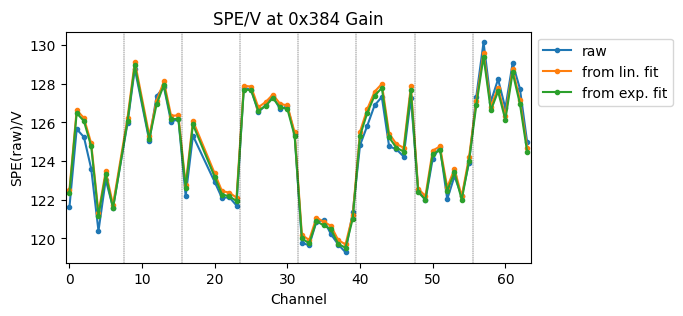

In [7]:
# plot SPE/V for each channel
plt.figure(figsize = (6,3))
plt.plot(df_calib_clean['ch'], df_calib_clean['SPEperV_0x384'], '.-', label=('raw'))
plt.plot(df_calib_clean['ch'], np.add(df_calib_clean['lin_slope']*0x384, df_calib_clean['lin_intercept']), '.-', label=('from lin. fit'))
plt.plot(df_calib_clean['ch'], np.multiply(df_calib_clean['exp_A'], np.exp(df_calib_clean['exp_b']*0x384/4096.*1.54)), '.-', label=('from exp. fit'))
plt.title("SPE/V at 0x384 Gain")
plt.xlabel("Channel")
plt.ylabel("SPE(raw)/V")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
for iAFE in range(8):
    plt.axvline(x=8*iAFE-0.5, color='k', linestyle='-'if iAFE==0 else '--', linewidth=0.3)
plt.gca().set_xlim(-0.5, 63+0.5)
plt.show()

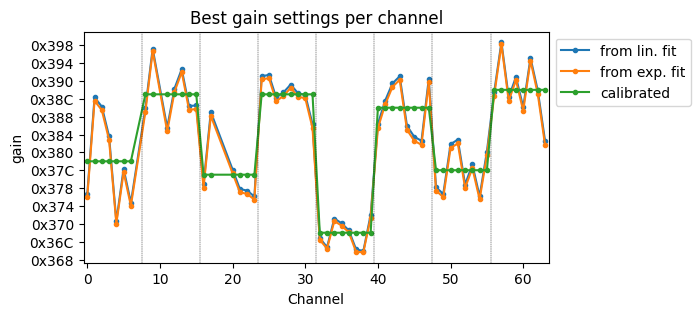

In [8]:
# channel-wise best gain
plt.figure(figsize = (6,3))
plt.plot(df_calib_clean['ch'], df_calib_clean['lin_gain_float'], '.-', label=('from lin. fit'))
plt.plot(df_calib_clean['ch'], df_calib_clean['exp_gain_float'], '.-', label=('from exp. fit'))
plt.plot(df_calib_clean['ch'], full_gain_list, '.-', label=('calibrated'))
plt.title("Best gain settings per channel")
plt.xlabel("Channel")
plt.ylabel("gain")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
for iAFE in range(8):
    plt.axvline(x=8*iAFE-0.5, color='k', linestyle='-'if iAFE==0 else '--', linewidth=0.3)
plt.gca().set_xlim(-0.5, 63+0.5)
fmt = ticker.FuncFormatter(to_hex)
plt.gca().get_yaxis().set_major_locator(ticker.MultipleLocator(0x4))
plt.gca().get_yaxis().set_major_formatter(fmt)
plt.show()

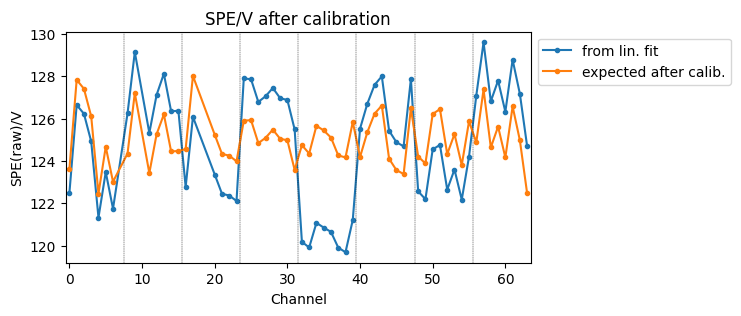

In [9]:
# expected SPE/V
plt.figure(figsize = (6,3))
plt.plot(df_calib_clean['ch'], np.add(df_calib_clean['lin_slope']*0x384, df_calib_clean['lin_intercept']), '.-', label=('from lin. fit'))
plt.plot(df_calib_clean['ch'], np.add(np.multiply(df_calib_clean['lin_slope'], np.array(full_gain_list)), df_calib_clean['lin_intercept']), '.-', label=('expected after calib.'))
plt.title("SPE/V after calibration")
plt.xlabel("Channel")
plt.ylabel("SPE(raw)/V")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
for iAFE in range(8):
    plt.axvline(x=8*iAFE-0.5, color='k', linestyle='-'if iAFE==0 else '--', linewidth=0.3)
plt.gca().set_xlim(-0.5, 63+0.5)
plt.show()

Text(0, 0.5, 'counts')

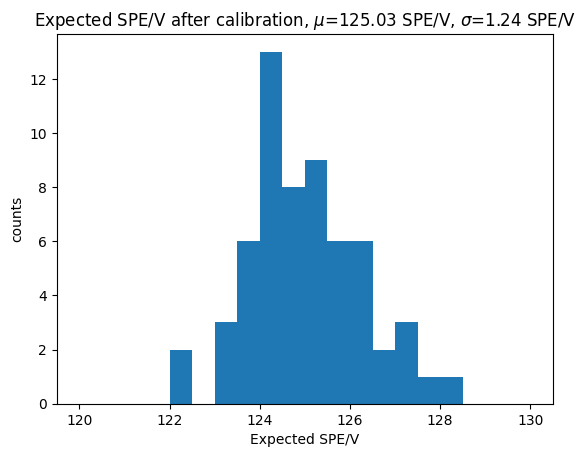

In [10]:
plt.figure()
rangemin = 120
rangemax = 130
step = 0.5
nbins = int((rangemax-rangemin)/step)
vals = np.add(np.multiply(df_calib_clean['lin_slope'], np.array(full_gain_list)), df_calib_clean['lin_intercept'])
plt.hist(vals, [float(rangemin)+step*float(i) for i in range(nbins+1)])
plt.title("Expected SPE/V after calibration, "+r'$\mu$'+"=%.2f SPE/V"%(np.mean(vals))+r', $\sigma$'+"=%.2f SPE/V"%(np.std(vals)))
plt.xlabel("Expected SPE/V")
plt.ylabel("counts")

In [13]:
print(list(df_calib_clean['ch']))
print(list(np.add(np.multiply(df_calib_clean['lin_slope'], np.array(full_gain_list)), df_calib_clean['lin_intercept'])))

[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
[123.62253886995464, 127.83310569156026, 127.40842200639085, 126.1057681125132, 122.45835110190967, 124.67055042408225, 123.02250125891544, 124.35069790962527, 127.20418845750999, 123.4277539149677, 125.26491272287947, 126.20142997127218, 124.44831173862676, 124.47308307150917, 124.56601441484167, 128.01729743349787, 125.24121486893159, 124.33190634136588, 124.25341125310337, 123.98448012833896, 125.9011930613668, 125.92983395065002, 124.84293361832556, 125.09385340544705, 125.47973843040765, 125.04893821120325, 124.97767679740849, 123.57977948760714, 124.74928437156055, 124.35070488816245, 125.66233648753675, 125.44231000001332, 125.10614240574756, 124.2628690619141, 124.16714763749167, 125.84475684425581, 124.18660519419953, 125.35479677644508, 126.2338446